# Clustering Tutorial


## _Problem Statement_

Data does not come labelled and labelling/veryifying labelling is a time- and resource-intensive process.
Often exploratory data analysis (EDA) can be enhanced when data can be split up into similar groups.

In order, to assist with these DAML introduces a clustering method that uses data in the format of (samples, features). This can be used with images or image embeddings as long as the arrays are flattened so that they only contain 2 dimensions.

The Clusterer class is not only as a clustering algorithm based on the HDBSCAN algorithm, but also outputs outliers and duplicates.


### _When to use_

The Clusterer should be used during the EDA process, to group a dataset into clusters, to verify labeling as a quality control, to identify outliers in your dataset, to identify duplicates in your dataset.


### _What you will need_

1. A 2 dimensional dataset (samples, features). Could be a set of flattened images or image embeddings. If using images, we recommend you use image embeddings (with the feature dimension being <=1000).


## _Getting Started_

Let's import the required libraries needed to set up a minimal working example


In [1]:
try:
    import google.colab  # noqa: F401

    %pip install -q daml
except Exception:
    pass

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as dsets

from daml._internal.detectors.clustering import Clusterer

## Loading in data

For the purposes of this demonstration, we are just going to create a generic set of blobs for clustering.

This is to help show all of the functionalities of the clusterer in one tutorial.


In [3]:
# Creating 5 clusters
test_data, labels = dsets.make_blobs(
    n_samples=100,
    centers=[(-1.5, 1.8), (-1, 3), (0.8, 2.1), (2.8, 1.5), (2.5, 3.5)],
    cluster_std=0.3,
    random_state=33,
)  # type: ignore

Because the clusterer can also detect duplicate data, we are going to modify the dataset to contain a few duplicate datapoints.


In [4]:
test_data[79] = test_data[24]
test_data[63] = test_data[58] + 1e-5
labels[79] = labels[24]
labels[63] = labels[58]

Visualizing the starting clusters


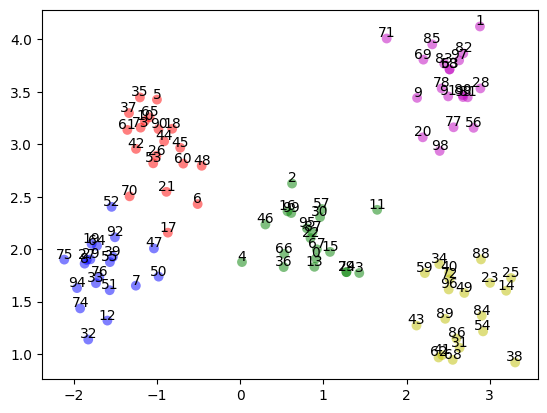

In [5]:
# Mapping from labels to colors
label_to_color = np.array(["b", "r", "g", "y", "m"])

# Translate labels to colors using vectorized operation
color_array = label_to_color[labels]

# Additional parameters for plotting
plot_kwds = {"alpha": 0.5, "s": 50, "linewidths": 0}

# Create scatter plot
plt.scatter(test_data.T[0], test_data.T[1], c=color_array, **plot_kwds)

# Annotate each point in the scatter plot
for i, (x, y) in enumerate(test_data):
    plt.annotate(str(i), (x, y), textcoords="offset points", xytext=(0, 1), ha="center")

Double checking that we got the right number of datapoints and the expected 2 dimensional shape


In [6]:
print("Number of samples: ", len(test_data))
print("Array shape:", test_data.ndim)

Number of samples:  100
Array shape: 2


## Running the Clusterer

We are now ready to throw our data into the clusterer and inspect the results


In [7]:
# Initialize the clusterer
clusterer = Clusterer(test_data)

# Evaluate the data
results = clusterer.evaluate()

The results come out as a dictionary. So we are going to list out each category followed by the number of items in the category and then display those items on the line below.

For the outlier and potential outlier results, the clusterer provides a list of all points that it found to be an outlier.

For the duplicates and near duplicate results, the clusterer provides a list of sets of points which it identified as duplicates.


In [8]:
# Show results
for category, finding in results.items():
    print(f"\t{category} - {len(finding)}")
    print(finding)

	outliers - 6
[4, 6, 11, 21, 38, 71]
	potential_outliers - 5
[1, 9, 42, 43, 48]
	duplicates - 2
[[24, 79], [58, 63]]
	near_duplicates - 10
[[8, 27, 29], [10, 65], [16, 99], [19, 64], [22, 87, 95], [33, 76], [39, 55], [40, 72], [41, 62], [80, 81, 93]]


We can see that there was 6 outliers and 5 potential outliers.
There was also 2 sets of duplicates and 10 sets of near duplicates.
